# Internal Cells
***

The first type of cell to be dicretised will be the cells which don't share a face with the boundary, internal cells. 

<!-- So now it's time to code this matrix: 

The derived expressions are for each cell with a $N$, $S$, $E$ & $W$ cell. That means there expressions are only true for the mesh points that are: not on the boundary; and a cell centre on the boundary: -->

Firstly let's visualise the cells without boundaries:

**SL: I think this creates unnecessary complication. I will remove later**


In [1]:
# To change visual cell values, kernel needs to be restarted
# Example values
Lx, Ly, nx, ny = 2, .1, 40, 4

from ipynb.fs.full.Background_Functions import writeDimensions
writeDimensions(nx, ny)

# Restart kernel after running this command


Make sure you write dimesnions using writeDimensions(nx, ny)
2 0.1 40 4


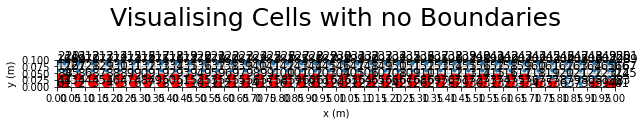

In [2]:

from ipynb.fs.full.Background_Functions import visualiseInternalCells
visualiseInternalCells(Lx, Ly, nx, ny)

The descretization of the unkown (LHS) partial derivatives in the x-equation $\left( \dfrac{\delta u}{\delta y}_N , \dfrac{\delta u}{\delta y}_S , \dfrac{\delta u}{\delta x}_E , \dfrac{\delta u}{\delta x}_W \right)$ and the y-equation $\left( \dfrac{\delta v}{\delta y}_N , \dfrac{\delta v}{\delta y}_S , \dfrac{\delta v }{\delta v}_E , \dfrac{\delta v}{\delta x}_W \right)$ are approximated as the difference between the displacement at cell P and the neighbouring cell, divided by the distance between them: 


***Note on direction*** Positive x-direction is left to right, positive y-direction is down to up

<!-- +

\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right) 
 _W |S_W|
)  -->


<img src="./Paper_Images/mesh_displacements.png" alt="Drawing" style="width: 600px;"/> 
<img src="./Paper_Images/partial_derivatives_mesh.png" alt="Drawing" style="width: 600px;"/> 

Continuing with the x and y momentum equations:

### x-equation:

$$
\frac{\rho}{\Delta t^2} \left( u_p^n V^n \right)
-
\mu \left( \dfrac{\delta u}{\delta y} \right)
_N |S_N|
+
\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
-
(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|
+
(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right)
 _W |S_W|
= RHS
$$

$$
\frac{\rho}{\Delta t^2} \left( u_P^n V^n \right)
-
\mu \left( \dfrac{ u_N - u_P }{dy} \right)
 |S_N|
+
\mu \left( \dfrac{ u_P - u_S }{dy} \right)
  |S_S|
-
(2\mu + \lambda)
\left(\dfrac{ u_E - u_P}{dx} \right)
  |S_E|
+
(2\mu + \lambda)
\left(\dfrac{ u_P - u_W}{dx}\right)
  |S_W|
=
RHS
$$

Grouping in terms of $u_P$, $u_N$, $u_S$, $u_E$ & $u_W$:

$$
u_P \left[
\frac{\rho}{\Delta t^2} V^n
+
\dfrac{\mu |S_N|}{dy}
+
\dfrac{\mu |S_S|}{dy}
+
\dfrac{(2\mu + \lambda) |S_E|}{dx}
+
\dfrac{(2\mu + \lambda) |S_W|}{dx}
\right]
-
u_N \dfrac{\mu |S_N|}{dy}
-
u_S \dfrac{\mu |S_S|}{dy}
-
u_E \dfrac{(2\mu + \lambda) |S_E|}{dx}
-
u_W \dfrac{(2\mu + \lambda) |S_W|}{dx}
=
RHS
$$

<!-- $$

u_P \left[

\frac{\rho}{\Delta t^2} V^n

+

\dfrac{\mu |S_N|}{dy}

+

\dfrac{\mu |S_S|}{dy}

+

\dfrac{(2\mu + \lambda) |S_E|}{dx}

+

\dfrac{(2\mu + \lambda) |S_W|}{dx}

\right]

-

u_N \dfrac{\mu |S_N|}{dy}

-

u_S \dfrac{\mu |S_S|}{dy}

-

u_E \dfrac{(2\mu + \lambda) |S_E|}{dx}

-

u_W \dfrac{(2\mu + \lambda) |S_W|}{dx}

=
RHS

$$ -->

<!-- ### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy}\right)
 _N |S_N|

+

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy} \right)
_S |S_S|
-

\mu
\left( \dfrac{\delta v}{dx}\right)
 _E |S_E|

+

\mu
\left( \dfrac{\delta v}{dx}\right)
 _W |S_W|


=
RHS

$$ -->



### y-equation:

$$
\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)
-
(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y}\right) 
 _N |S_N|
+
(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y} \right)
_S |S_S|
- 
\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _E |S_E|
+ 
\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _W |S_W|
= RHS
$$


$$
\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)
-
(2\mu + \lambda)
\left(\dfrac{v_N - v_P}{dy}\right) 
|S_N|
+
(2\mu + \lambda)
\left(\dfrac{v_P - v_S}{dy} \right)
|S_S|
- 
\mu
\left( \dfrac{v_E - v_P}{dx}\right)
|S_E|
+ 
\mu
\left( \dfrac{v_P - v_W}{dx}\right)
|S_W|
= 
RHS
$$

Grouping in terms of $u_P$, $u_N$, $u_S$, $u_E$ & $u_W$:

$$
v_P \left[
\frac{\rho}{\Delta t^2} V^n
+ 
\dfrac{(2\mu + \lambda)  |S_N|}{dy} 
+
\dfrac{(2\mu + \lambda)  |S_S|}{dy} 
+
\dfrac{\mu |S_E|}{dx}
+
\dfrac{\mu |S_W|}{dx}
\right]
-
v_N \dfrac{(2\mu + \lambda) |S_N|}{dy}
-
v_S \dfrac{(2\mu + \lambda) |S_S|}{dy}
- 
v_E \dfrac{\mu |S_E|}{dx} 
- 
v_W \dfrac{\mu |S_W|}{dx} 
= 
RHS
$$

<!-- $$

v_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{(2\mu + \lambda)  |S_N|}{dy} 

+

\dfrac{(2\mu + \lambda)  |S_S|}{dy} 

+

\dfrac{\mu |S_E|}{dx}

+

\dfrac{\mu |S_W|}{dx}

\right]

-

v_N \dfrac{(2\mu + \lambda) |S_N|}{dy}

-

v_S \dfrac{(2\mu + \lambda) |S_S|}{dy}

- 

v_E \dfrac{\mu |S_E|}{dx} 

- 

v_W \dfrac{\mu |S_W|}{dx} 

= 
RHS

$$ -->

The descretization of the kown (RHS) partial derivatives in the x-equation $\left( \dfrac{\delta v}{\delta x}_N , \dfrac{\delta x}{\delta x}_S , \dfrac{\delta v}{\delta y}_E , \dfrac{\delta v}{\delta y}_W \right)$ and the y-equation $\left( \dfrac{\delta u}{\delta x}_N , \dfrac{\delta u}{\delta x}_S , \dfrac{\delta u }{\delta y}_E , \dfrac{\delta u}{\delta y}_W \right)$ are slightly more complicated. 

Firstly, we need to approximate the displacement values are the cell corner (blue below). From this we approximate the partial derivative at the face centre as the difference between the corner values divided by the distance between them

<img src="./Paper_Images/cornerDisplacements.png" alt="Drawing" style="width: 600px;"/> 
<img src="./Paper_Images/unkownDerivation.png" alt="Drawing" style="width: 600px;"/> 

The corner displacement values are approximated as the average of the cell centres displacements of the surrounding cells:

<img src="./Paper_Images/unkownDerivation_2.png" alt="Drawing" style="width: 600px;"/> 


### x-equation:

$$
LHS = 
\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)
+
\mu \left( \dfrac{\delta v}{\delta x}  \right)
 _N |S_N|
-
\mu \left( \dfrac{\delta v}{\delta x} \right)
_S |S_S|
+ 
\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_E |S_E|
- 
\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_W |S_W|
$$

$$
LHS = 
\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)
+
\mu \left( \dfrac{{u_{NE}}_c - {u_{NW}}_c}{dx}  \right)
|S_N|
-
\mu \left( \dfrac{{u_{SE}}_c - {u_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
\lambda
\mu \left( \dfrac{{u_{NE}}_c - {u_{SE}}_c}{dx}  \right)
_E |S_E|
- 
\lambda
\mu \left( \dfrac{{u_{NW}}_c - {u_{SW}}_c}{dx}  \right)
_W |S_W|
$$

### y-equation:

$$
LHS =
\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)
+
(2\mu + \lambda) 
\left(\dfrac{\delta u}{\delta x} \right)
 _N |S_N|
-
(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
_S |S_S|
+ 
\mu
\left( \dfrac{\delta u}{\delta y} \right)
_E |S_E|
- 
\mu 
\left(  \dfrac{\delta u}{\delta y} \right) 
_W |S_W|
$$

$$
LHS =
\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)
+
(2\mu + \lambda) 
\left( \dfrac{{v_{NE}}_c - {v_{NW}}_c}{dx}  \right)
 _N |S_N|
-
(2\mu + \lambda)
\left( \dfrac{{v_{SE}}_c - {v_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
\mu
\left( \dfrac{{v_{NE}}_c - {v_{SE}}_c}{dx}  \right)
_E |S_E|
- 
\mu 
\left( \dfrac{{v_{NW}}_c - {v_{SW}}_c}{dx}  \right)
_W |S_W|
$$

## Temporal terms

LHS:

$\frac{\rho}{\Delta t^2} \left( u_p^n V^n \right)$, 
$\frac{\rho}{\Delta t^2} \left( v_p^n V^n \right)$

RHS:

$\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)$,
$\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)$

Let's code the variables that's needed

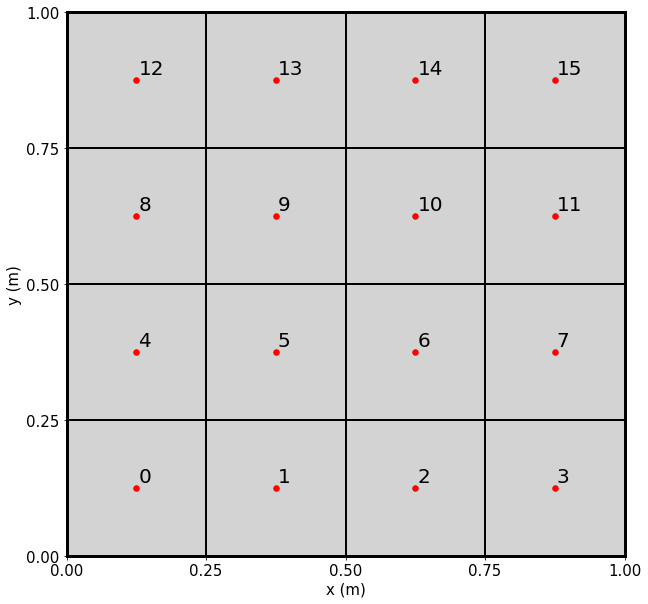

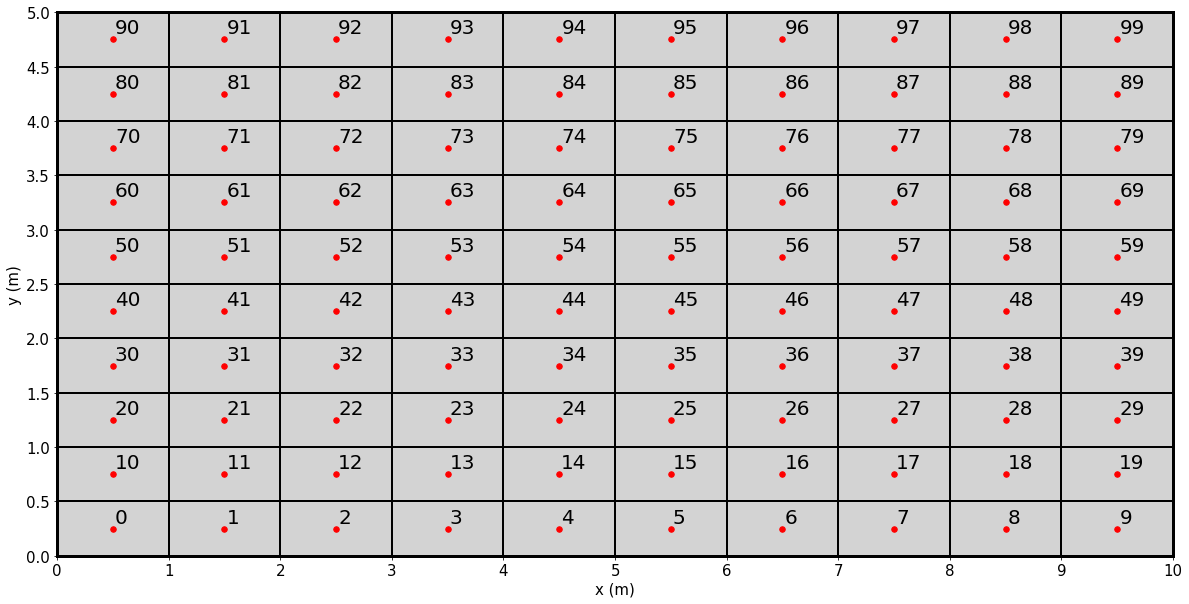

(100, 2)
Number of nodes in Mesh: 100
Number of dimensions: 2


In [3]:
import numpy as np
from ipynb.fs.full._01_Defining_Mesh import initalise_U_field

# Density (kg/m^3)-> using a similar value to steel
rho = 8050 

# Timestep size (s)
dt = 1

nx, ny = 40, 4
Lx, Ly = 2, 0.1

# Displacement fields -> this will the displacement values in the x and y direction for each point on the mesh
# All initial values are set to zero
U_new = initalise_U_field(nx, ny)
U_old = initalise_U_field(nx, ny)
U_old_old = initalise_U_field(nx, ny)

U_previous = U_new

# As we're using a structured mesh, we assume the volume of each CV remains constant
# Therefore: V_new = V_old = V_old_old = V (m^3)

dy = Ly/ny   # Length of each control volume in the y-direction
dx = Lx/nx   # Length of each control volume in the x-direction

V = dx*dy

## Force term

The formulas for the Shear Modulus $\mu$ and Lame Modulus $\lambda$ are given in terms of the Elastic Modulus $E$ and Poisson's ratio $v$:

$$ \mu= \frac{E}{2(1+v)} $$
$$ \lambda= \frac{v E}{(1+v)(1-2v)} $$

In [4]:
# Elastic Modulus (Pa) 
E = 200*1e9

# Poissons Ratio 
v = 0.3

# Shear Modulus (Pa)
mu = E/(2*(1+v))
print("Shear Modulus (mu): " + str(mu))

# Lame Modulus (Pa)
Lambda = (v*E)/((1+v)*(1-2*v))
print("Lame Modulus (Lambda): " + str(Lambda))

# NOTE "lambda" is an internal function in python, hence "Lambda" is use as a variable name

Shear Modulus (mu): 76923076923.07692
Lame Modulus (Lambda): 115384615384.61539


### Labelling Coefficients

Labelling these coefficients will allow us to avoid "hard coding" the values $\mu$ and $\lambda$


Returning to the momentum equation:


$$ \underbrace{ \frac{\rho}{\Delta t^2} \left(  \boldsymbol{u}_p^n V^n -2 \boldsymbol{u}_p^o V^o + \boldsymbol{u}_p^{oo} V^{oo} \right)}_{Temporal\space term} 
-
\underbrace{
\sum_{f=1}^{nFaces} \begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_f \cdot \boldsymbol{S_f}
}_{Force\space term}
 = 0 $$

which expands to:

$$
\frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_p^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_p^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_p^{oo} V^{oo} \right)
-
\begin{bmatrix}
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_N   |S_N|
-
\begin{bmatrix}
 - \mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
 - \left( (2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x} \right)
\end{bmatrix}_S   |S_S|
-
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\end{bmatrix}_E   |S_E|
-
\begin{bmatrix}
- \left((2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y} \right)
\\
- \mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\end{bmatrix}_W   |S_W|
= 0
$$


we can group the force term coefficients as so: 

$$
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
= 
\begin{bmatrix}
(K_{E, W, u, x})\dfrac{\delta u}{\delta x} + (K_{E, W, v, x})\dfrac{\delta v}{\delta y}
& 
(K_{N, S, v, x}) \dfrac{\delta v}{\delta x} + (K_{N, S, u, x}) \dfrac{\delta u}{\delta y}
\\
(K_{E, W, v, y})\dfrac{\delta v}{\delta x} + (K_{E, W, u, y})\dfrac{\delta u}{\delta y}
&
(K_{N, S, v, y})\dfrac{\delta v}{\delta y}
+ 
(K_{N, S, v, y})\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$



using the format $K_{NSEW, uv, xy}$

The first term refers to face: either $N$, $S$, $E$ or $W$

The second term refers to the displacement direction: either $u$ or $v$

The third term refers to the momentum equation direction: either $x$ or $y$

$$
\frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_p^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_p^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_p^{oo} V^{oo} \right)
-
\begin{bmatrix}
(K_{N, v, x}) \dfrac{\delta v}{\delta x}  + (K_{N, u, x}) \dfrac{\delta u}{\delta y} 
\\
(K_{N, v, y})\dfrac{\delta v}{\delta y} + (K_{N, u, y})\dfrac{\delta u}{\delta x}
\end{bmatrix}_N   |S_N|
-
\begin{bmatrix}
(K_{S, v, x}) \dfrac{\delta v}{\delta x}  + (K_{S, u, x}) \dfrac{\delta u}{\delta y} 
\\
(K_{S, v, y})\dfrac{\delta v}{\delta y} + (K_{S, u, y})\dfrac{\delta u}{\delta x}
\end{bmatrix}_S   |S_S|
-
\begin{bmatrix}
(K_{E, u, x})\dfrac{\delta u}{\delta x} + (K_{E, v, x})\dfrac{\delta v}{\delta y}
\\
(K_{E, v, y})  \dfrac{\delta v}{\delta x} + (K_{E, u, y}) \dfrac{\delta u}{\delta y} 
\end{bmatrix}_E   |S_E|
-
\begin{bmatrix}
(K_{W, u, x})\dfrac{\delta u}{\delta x} + (K_{W, v, x})\dfrac{\delta v}{\delta y}
\\
(K_{W, v, y})  \dfrac{\delta v}{\delta x} + (K_{W, u, y}) \dfrac{\delta u}{\delta y} 
\end{bmatrix}_W   |S_W|
= 0
$$


|  |E/W | E/W | N/S | N/S |
--|:---------:|:-----------:|:---------:|:-----------:|
|  | **u** | **v** | **u**  | **v** |
|**x**| $$K_{E, W, u, x}$$    |   $$K_{E, W, v, x}$$  |   $$K_{N, S, u, x}$$    |    $$K_{N, S, v, x}$$
|**y**| $$K_{E, W, u, y}$$    |   $$K_{E, W, v, y}$$  |   $$K_{N, S, u, y}$$    |    $$K_{N, S, v, y}$$


|  |E/W | E/W | N/S | N/S |
--|:---------:|:-----------:|:---------:|:-----------:|
|  | **u** | **v** | **u**  | **v** |
|**x**| $$2\mu + \lambda $$    |   $$\lambda$$  |   $$\mu$$    |    $$\mu$$ |
|**y**| $$\mu$$    |   $$\mu$$  |  $$\lambda$$    |  $$2\mu + \lambda$$  |

N/S and E/W have the same modulus value coefficients, however, N and E are positive and S and W are negative

Creating a coeficient function:

In [5]:
import numpy as np

def coef(xy, face, uv):

    coef = np.zeros((2,2,2))
    # i = E/W, N/S
    # j = u, v
    # k = x, y 

    coef[0,0,0] =  2*mu + Lambda      # E/W, u, x
    coef[0,0,1] =  mu                  # E/W, u, y
    coef[0,1,0] =  Lambda             # E/W, v, x            
    coef[0,1,1] =  mu                  # E/W, v, y
    coef[1,0,0] =  mu                  # N/S, u, x
    coef[1,0,1] =  Lambda             # N/S, u, y
    coef[1,1,0] =  mu                  # N/S, v, x            
    coef[1,1,1] =  2*mu + Lambda      # N/S, v, y

    if (face == "E") | ((face == "W")):
        i = 0
    elif (face == "N") | ((face == "S")):
        i = 1
    if uv == "u":
        j = 0
    elif uv == "v":
        j = 1
    if xy == "x":
        k = 0
    elif xy == "y":
        k = 1

    if (face == "E") | ((face == "N")):
        return + coef[i,j,k]
    if (face == "W") | ((face == "S")):
        return - coef[i,j,k]

# A matrix
***

<!-- From Equation X,  -->

Identifying $a_P$, $a_N$, $a_S$, $a_E$ & $a_W$
### x-equation:



$$ a_P = \left[
\frac{\rho}{\Delta t^2} V^n
+ 
\dfrac{\mu |S_N|}{dy} 
+
\dfrac{\mu |S_S|}{dy} 
+
\dfrac{(2\mu + \lambda) |S_E|}{dx}
+
\dfrac{(2\mu + \lambda) |S_W|}{dx}
\right]  
$$

$$

\begin{align*} 
a_N & = \dfrac{\mu |S_N|}{dy} & = & &(K_{N, u, x}) \dfrac{|S_N|}{dy} \\

a_S & = \dfrac{\mu |S_S|}{dy} & = & &(-K_{S, u, x}) \dfrac{|S_S|}{dy} \\

a_E & = \dfrac{(2\mu + \lambda) |S_E|}{dx} & = & &(K_{E, u, x}) \dfrac{|S_E|}{dx} \\

a_W & = \dfrac{(2\mu + \lambda) |S_W|}{dx} & = & &(-K_{W, u, x}) \dfrac{|S_W|}{dx} \\
\end{align*} 
$$

$$ 
a_P = \left[
\frac{\rho}{\Delta t^2} V^n
+ 
a_N
+
a_S
+
a_E
+
a_W
\right]
$$



In [6]:
# Surface area vectors

S_N = Sfy = dx
S_S = Sfy = dx
S_E = Sfx = dy
S_W = Sfx = dy

In [7]:
# a terms

a_N_x = (mu)*S_N/dy 
a_S_x = (mu)*S_S/dy 
a_E_x = (2*mu + Lambda)*S_E/dx
a_W_x = (2*mu + Lambda)*S_W/dx

# Similarly this can be written using the coef function

a_N_x = + coef("x", "N", "u")*(S_N)/dy
a_S_x = - coef("x", "S", "u")*(S_S)/dy
a_E_x = + coef("x", "E", "u")*(S_E)/dx
a_W_x = - coef("x", "W", "u")*(S_W)/dx

a_P_x = rho*dx*dy/(dt**2) + a_N_x + a_S_x + a_E_x + a_W_x

### y-equation:

$$
a_P  = \left[
\frac{\rho}{\Delta t^2} V^n
+ 
\dfrac{(2\mu + \lambda)  |S_N|}{dy} 
+
\dfrac{(2\mu + \lambda)  |S_S|}{dy} 
+
\dfrac{\mu |S_E|}{dx}
+
\dfrac{\mu |S_W|}{dx}
\right]
$$

$$
\begin{align*} 

a_N &=  \dfrac{(2\mu + \lambda) |S_N|}{dy} &=&  &(K_{N, v, y}) \dfrac{|S_N|}{dy}&  \\

a_S &=  \dfrac{(2\mu + \lambda) |S_S|}{dy} &=& &(-K_{S, v, y}) \dfrac{|S_S|}{dy}&  \\

a_E &=  \dfrac{\mu |S_E|}{dx}  &=&  &(K_{E, v, y}) \dfrac{|S_E|}{dx}& \\

a_W &=  \dfrac{\mu |S_W|}{dx}  &=&  &(-K_{W, v, y}) \dfrac{|S_W|}{dx}& \\

\end{align*}
$$

$$
a_P  = \left[
\frac{\rho}{\Delta t^2} V^n
+ 
a_N
+
a_S
+
a_E
+
a_W
\right]
$$

In [8]:
# a terms

a_N_y = (2*mu + Lambda)*S_N/dy
a_S_y = (2*mu + Lambda)*S_S/dy
a_E_y = (mu) *S_E/dx
a_W_y = (mu) *S_W/dx

# Similarly this can be written using the coef function

a_N_y = + coef("y", "N", "v")*(S_N)/dy
a_S_y = - coef("y", "S", "v")*(S_S)/dy
a_E_y = + coef("y", "E", "v")*(S_E)/dx
a_W_y = - coef("y", "W", "v")*(S_W)/dx

a_P_y = rho*dx*dy/(dt**2) + a_N_y + a_S_y + a_E_y + a_W_y

Now to create the A matrix we loop through each row in the A matrix (where each row referes to a point in the mesh) and assign the $a$ terms in their corresponding positions:

Remember the x and y equations take the form:

**x-equation:**

$u_P  a_P - u_N a_N - u_S a_S - u_E a_E - u_W a_W=b$

**y-equation:**

$v_P  a_P - v_N a_N - v_S a_S - v_E a_E - v_W a_W=b$

In [9]:
from ipynb.fs.full.Background_Functions import cell_index

def createMatrix():

    # Initialise A matrix with zeros   

    from scipy.sparse import csr_matrix

    # A_shell = csr_matrix(((ny+2)*(nx+2), (ny+2)*(nx+2))).toarray()   
    A_shell = np.zeros([ny*nx, ny*nx])

    A_no_boundary_x = A_shell
    A_no_boundary_y = A_shell

    # Loop through each point in matrix
    for k in range(0, ny*nx):

        #This applies the a terms to call cells not on the boundary

        # Momentum equation:
        # u_Pa_P - u_Na_N - u_Sa_S - u_Ea_E - u_Wa_W = b  
        if cell_index().no_boundary(k):
        
            A_no_boundary_x[k,k] = a_P_x
            A_no_boundary_x[k,index(k).n] = -a_N_x
            A_no_boundary_x[k,index(k).s] = -a_S_x
            A_no_boundary_x[k, index(k).e] = -a_E_x
            A_no_boundary_x[k, index(k).w] = -a_W_x

            A_no_boundary_y[k,k] = a_P_y
            A_no_boundary_y[k,index(k).n] = -a_N_y
            A_no_boundary_y[k,index(k).s] = -a_S_y
            A_no_boundary_y[k, index(k).e] = -a_E_y
            A_no_boundary_y[k, index(k).w] = -a_W_y


    return A_no_boundary_x, A_no_boundary_y

Now we have a function we can call that produces an A matrix for the x and y-equation with the terms filled for cells with no boundaries.

Now we need to code the 1D b-matrix

# Coding the B matrix
***

Firstly we need to write a function that approximates the displacment ($u$, $v$) values at the corner of each cell. Previously we decribed this as the averge of the displacements of cell centres of the surrounding cells. (INSERT IMAGE AGAIN?)

In [10]:
from ipynb.fs.full.Background_Functions import displacement

# U_array is the 2D array for the U field

def corner(corner_placement, uv, U_array, k):
    if uv == "u":
        uv_i = 0
    elif uv == "v":
        uv_i = 1

    # The displacement function returns the u or v values (uv_i) for a particular cell (k) within a displacement field (U_array)
    # disp below is the u or v value at cell k 
    disp = displacement(k, U_array, uv_i)

    if corner_placement == "NE":
        return (1/4)*(disp.P + disp.NE + disp.N + disp.E)
    if corner_placement == "SE":
        return (1/4)*(disp.P + disp.SE + disp.S + disp.E)
    if corner_placement == "SW":
        return (1/4)*(disp.P + disp.SW + disp.S + disp.W)
    if corner_placement == "NW":
        return (1/4)*(disp.P + disp.NW + disp.N + disp.W)

Coding the following equations: 

### x-equation:

$$
\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)
+
\mu \left( \dfrac{{v_{NE}}_c - {v_{NW}}_c}{dx}  \right)
 |S_N|
-
\mu \left( \dfrac{{v_{SE}}_c - {v_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
\lambda \left( \dfrac{{v_{NE}}_c - {v_{SE}}_c}{dy}  \right)
_E |S_E|
- 
\lambda \left( \dfrac{{v_{NW}}_c - {v_{SW}}_c}{dy}  \right)
_W |S_W|
$$

$$
\frac{\rho}{\Delta t^2} \left( 2  u_p^o V^o - u_p^{oo} V^{oo} \right)
+
(K_{N, v, x}) \left( \dfrac{{v_{NE}}_c - {v_{NW}}_c}{dx}  \right)
 |S_N|
+
(K_{S, v, x}) \left( \dfrac{{v_{SE}}_c - {v_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
(K_{E, v, x}) \left( \dfrac{{v_{NE}}_c - {v_{SE}}_c}{dy}  \right)
_E |S_E|
+ 
(K_{W, v, x}) \left( \dfrac{{v_{NW}}_c - {v_{SW}}_c}{dy}  \right)
_W |S_W|
$$



In [11]:
b_matrix_shell = np.zeros([(ny+2)*(nx+2), 1])

b_matrix_x = b_matrix_shell

# Loop through each row in the b_matrix
for k in np.arange(0,(nx+2)*(ny+2)): 

    if cell_index().no_boundary(k):     
           
        b_matrix_x[k] = (rho/(dt**2))*( 2*(U_old[k,0])*dx*dy - U_old_old[k,0]*dx*dy) + (
                    + mu*(corner("NE", "v", U_previous, k) - corner("NW", "v", U_previous, k))
                    - mu*(corner("SE", "v", U_previous, k) - corner("SW", "v", U_previous, k))
                    + Lambda*(corner("NE", "v", U_previous, k) - corner("SE", "v", U_previous, k))
                    - Lambda*(corner("NW", "v", U_previous, k) - corner("SW", "v", U_previous, k))
        )



### y-equation:

$$
\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)
+
(2\mu + \lambda) 
\left( \dfrac{{u_{NE}}_c - {u_{NW}}_c}{dx}  \right)
 _N |S_N|
-
(2\mu + \lambda)
\left( \dfrac{{u_{SE}}_c - {u_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
\mu
\left( \dfrac{{u_{NE}}_c - {u_{SE}}_c}{dy}  \right)
_E |S_E|
- 
\mu 
\left( \dfrac{{u_{NW}}_c - {u_{SW}}_c}{dy}  \right)
_W |S_W|
$$

$$
\frac{\rho}{\Delta t^2} \left( 2  v_p^o V^o - v_p^{oo} V^{oo} \right)
+
(K_{N, u, y})
\left( \dfrac{{u_{NE}}_c - {u_{NW}}_c}{dx}  \right)
 _N |S_N|
+
(K_{S, u, y})
\left( \dfrac{{u_{SE}}_c - {u_{SW}}_c}{dx}  \right)
_S |S_S|
+ 
(K_{N, u, y})
\left( \dfrac{{u_{NE}}_c - {u_{SE}}_c}{dy}  \right)
_E |S_E|
+
(K_{N, u, y})
\left( \dfrac{{u_{NW}}_c - {u_{SW}}_c}{dy}  \right)
_W |S_W|
$$

In [12]:
b_matrix_y = b_matrix_shell

# Loop through each row in the b_matrix
for k in np.arange(0,(nx+2)*(ny+2)):

    if cell_index().no_boundary(k): 
        
        b_matrix_y[k] = (rho/(dt**2))*( 2*(U_old[k,1])*dx*dy - U_old_old[k,1]*dx*dy) + (
                    + (2*mu + Lambda)*(corner("NE", "u", U_previous, k) - corner("NW", "u", U_previous, k))
                    - (2*mu + Lambda)*(corner("SE", "u", U_previous, k) - corner("SW", "u", U_previous, k))
                    + mu*(corner("NE", "u", U_previous, k) - corner("SE", "u", U_previous, k))
                    - mu*(corner("NW", "u", U_previous, k) - corner("SW", "u", U_previous, k))
        )    

Using the coefficient we can create a generalised b-term functions:

In [13]:
# b temporal term
def b_temp(U_old, U_old_old, k, xy):

    if xy == "x":
        b_temporal_term = (rho/(dt**2))*( 2*(U_old[k,0])*dx*dy - U_old_old[k,0]*dx*dy)
    if xy == "y":
        b_temporal_term = (rho/(dt**2))*( 2*(U_old[k,1])*dx*dy - U_old_old[k,1]*dx*dy)
    
    return b_temporal_term

def b_force(k, xy, U_previous):

    if xy == "x":
        uv = "v"
    if xy == "y":
        uv = "u"

    b_force = (
                    S_N*A.coef(xy, "N", uv)*(
                        (A.corner("NE", uv, U_previous, k) - A.corner("NW", uv, U_previous, k))
                        /dx)
                    + 
                    S_S*A.coef(xy, "S", uv)*(
                        (A.corner("SE", uv, U_previous, k) - A.corner("SW", uv, U_previous, k))
                        /dx)
                    +
                    S_E*A.coef(xy, "E", uv)*(
                        (A.corner("NE", uv, U_previous, k) - A.corner("SE", uv, U_previous, k))
                        /dy)
                    +
                    S_W*A.coef(xy, "W", uv)*(
                        (A.corner("NW", uv, U_previous, k) - A.corner("SW", uv, U_previous, k))
                        /dy)
    )

    return b_force

Let's now combine the A matrix coefficients, and b-equation temporal and force terms into a single class. This way we will easily be able to point to the values. This will be shown later.

In [14]:
transient = False

In [15]:
from ipynb.fs.full.Background_Functions import index

class A(index, displacement):

    def __init__(self, xy):

        if xy == "x":
            uv = "u"

        if xy == "y":
            uv = "v"

        self.a_N = + A.coef(xy, "N", uv)*(Sfy)/dy
        self.a_S = - A.coef(xy, "S", uv)*(Sfy)/dy
        self.a_E = + A.coef(xy, "E", uv)*(Sfx)/dx
        self.a_W = - A.coef(xy, "W", uv)*(Sfx)/dx

        if transient:
            self.a_P = (rho*dx*dy/(dt**2)) + self.a_N + self.a_S + self.a_E + self.a_W
        else:
            self.a_P = self.a_N + self.a_S + self.a_E + self.a_W


    def createMatrix(self):

        A_no_boundary = np.zeros([ny*nx, ny*nx])

        for k in range(0, ny*nx):
            if cell_index().no_boundary(k):   
                
                A_no_boundary[k,k] = self.a_P
                A_no_boundary[k,index(k).n] = -self.a_N
                A_no_boundary[k,index(k).s] = -self.a_S
                A_no_boundary[k, index(k).e] = -self.a_E
                A_no_boundary[k, index(k).w] = -self.a_W

        return A_no_boundary

    # b temporal term
    def b_temp(U_old, U_old_old, k, xy):

        if xy == "x":
            if transient:
                b_temporal_term = (rho/(dt**2))*( 2*(U_old[k,0])*dx*dy - U_old_old[k,0]*dx*dy)
            else:
                b_temporal_term = 0

        if xy == "y":
            if transient:
                b_temporal_term = (rho/(dt**2))*( 2*(U_old[k,1])*dx*dy - U_old_old[k,1]*dx*dy)
            else:
                b_temporal_term = 0
        
        return b_temporal_term
    
    def b_force(k, xy, U_previous):

        if xy == "x":
            uv = "v"
        if xy == "y":
            uv = "u"

        b_force = (
                        Sfy*A.coef(xy, "N", uv)*(
                            (A.corner("NE", uv, U_previous, k) - A.corner("NW", uv, U_previous, k))
                            /dx)
                        + 
                        Sfy*A.coef(xy, "S", uv)*(
                            (A.corner("SE", uv, U_previous, k) - A.corner("SW", uv, U_previous, k))
                            /dx)
                        +
                        Sfx*A.coef(xy, "E", uv)*(
                            (A.corner("NE", uv, U_previous, k) - A.corner("SE", uv, U_previous, k))
                            /dy)
                        +
                        Sfx*A.coef(xy, "W", uv)*(
                            (A.corner("NW", uv, U_previous, k) - A.corner("SW", uv, U_previous, k))
                            /dy)
        )

        return b_force
    
    def corner(corner_placement, uv, U_previous, k):
        if uv == "u":
            uv_i = 0
        elif uv == "v":
            uv_i = 1

        disp = displacement(k, U_previous, uv_i)

        if corner_placement == "NE":
            return (1/4)*(disp.P + disp.NE + disp.N + disp.E)
        if corner_placement == "SE":
            return (1/4)*(disp.P + disp.SE + disp.S + disp.E)
        if corner_placement == "SW":
            return (1/4)*(disp.P + disp.SW + disp.S + disp.W)
        if corner_placement == "NW":
            return (1/4)*(disp.P + disp.NW + disp.N + disp.W)


    
    def coef(xy, face, uv):
    # could have and statements

        coef = np.zeros((2,2,2))
        # i = E/W, N/S
        # j = u, v
        # k = x, y 

        coef[0,0,0] =  2*mu + Lambda      # E/W, u, x
        coef[0,0,1] =  mu                  # E/W, u, y
        coef[0,1,0] =  Lambda             # E/W, v, x            
        coef[0,1,1] =  mu                  # E/W, v, y
        coef[1,0,0] =  mu                  # N/S, u, x
        coef[1,0,1] =  Lambda             # N/S, u, y
        coef[1,1,0] =  mu                  # N/S, v, x            
        coef[1,1,1] =  2*mu + Lambda      # N/S, v, y

        if (face == "E") | ((face == "W")):
            i = 0
        elif (face == "N") | ((face == "S")):
            i = 1
        if uv == "u":
            j = 0
        elif uv == "v":
            j = 1
        if xy == "x":
            k = 0
        elif xy == "y":
            k = 1

        if (face == "E") | ((face == "N")):
            return + coef[i,j,k]
        if (face == "W") | ((face == "S")):
            return - coef[i,j,k]

In [16]:
Lambda

115384615384.61539